In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AmericanFootball98.csv')

df['team'] = df['team_code'].str.slice(0, 3) 
df['year'] = df['team_code'].str.slice(3) 

In [4]:
# Question 1: Which teams improve and worsened the most over the span of our data?

teams_delta_wins = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	if len(team_df) == 2020 - 1999:
		
		early_total = 0
		late_total  = 0

		for year in range(2015, 2020):
			late_total += int(team_df[ team_df["year"] == str(year)].iloc[0]["wins"])
		
		for year in range(1999, 2004):
			early_total += int(team_df[ team_df["year"] == str(year)].iloc[0]["wins"])

		teams_delta_wins[team] = (late_total - early_total)/5

teams_delta_wins = dict(sorted(teams_delta_wins.items(), key=lambda item: item[1]))

print("Question 1: Which team gained/lost the most wins per season between 1999-2003 and 2015-2019")
print(list(teams_delta_wins.keys())[-1] + " changed " + str(list(teams_delta_wins.values())[-1]))
print(list(teams_delta_wins.keys())[0]  + " changed " + str(list(teams_delta_wins.values())[0]))


Question 1: Which team gained/lost the most wins per season between 1999-2003 and 2015-2019
nwe changed 3.0
tam changed -3.4



How did Kansas City Chiefs stats change with a new coach in 2013?
Avg wins during 2006 - 2013: 5.428571428571429
Avg wins during 2013 - 2019: 11.0
Change in avg wins after new coach: 5.571428571428571


C:\Users\llsad\AppData\Local\Temp\ipykernel_23088\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_23088\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_23088\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_23088\824396651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
C:\Users\llsad\AppData\Local\Temp\ipykernel_23088\824396651.py:7: UserWarning: Boole

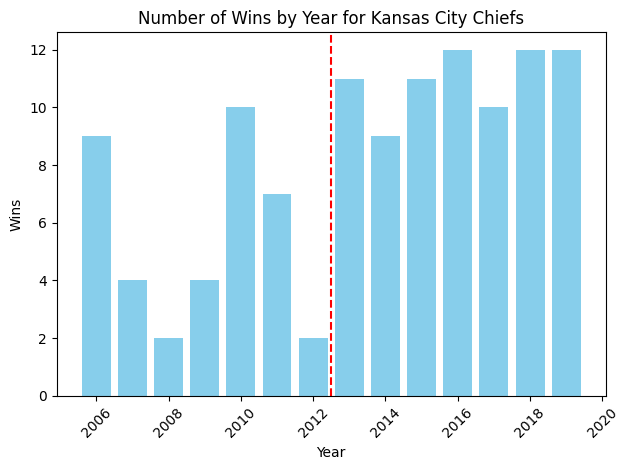

In [5]:
# Question 2: Did Kansas City Chiefs actually become stronger after getting a new coach in 2013?

early_total = 0
late_total  = 0

for year in range(2006, 2013):
	early_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])
	
for year in range(2013, 2020):
	late_total += int(df[df["year"] == str(year)][df["team"] == "kan"].iloc[0]["wins"])

print("\nHow did Kansas City Chiefs stats change with a new coach in 2013?")
print("Avg wins during 2006 - 2013: " + str(early_total / 7))
print("Avg wins during 2013 - 2019: " + str(late_total / 7))
print("Change in avg wins after new coach: " + str((late_total - early_total) / 7))

plt.bar(range(2006,2020), df[df["team"] == "kan"][df["year"].astype(int) > 2005].sort_values(by="year", ascending=True)["wins"], color="skyblue")
plt.title("Number of Wins by Year for Kansas City Chiefs")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x=2012.5, color="red", linestyle="--", linewidth=1.5, label="new coach")

plt.show()

In [6]:
# Question 3: Which teams get the most favor in penalty calls?

teams_delta_pen = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	if len(team_df) == 2020 - 1999:
		
		for year in range(1999, 2020):
			late_total += int(team_df[ team_df["year"] == str(year)].iloc[0]["opp penalties"])

		teams_delta_pen[team] = (late_total - early_total)/21

teams_delta_pen = dict(sorted(teams_delta_pen.items(), key=lambda item: item[1]))

print("Which team get most favor during penalties?")
for i in range(5):
	print(list(teams_delta_pen.keys())[-i-1] + " get given an average of " + str(int(list(teams_delta_pen.values())[-i-1])) + " penalties")


Which team get most favor during penalties?
cin get given an average of 3179 penalties
ram get given an average of 3077 penalties
gnb get given an average of 2974 penalties
phi get given an average of 2870 penalties
den get given an average of 2765 penalties


In [7]:
# Question 4: What is each team's best 5-year streak?
if False:
	teams_best_streak = {}
	for team in set(df['team']):	
		team_df = df[df['team'] == team]
		
		if len(team_df) == 2020 - 1999:
			
			best_score = -1
			best_year = -1
			for year in range(1999, 2015):
				
				score = 0	
				for inc in range(5):
					score += team_df[ team_df["year"] == str(year + inc)].iloc[0]["wins"]
					
				score /= 5
				if score > best_score:
					best_year  = year
					best_score = score
				
			teams_best_streak[team] = (best_score, int(best_year))
			
	teams_best_streak = dict(sorted(teams_best_streak.items(), key=lambda item: item[1][0]))
	print("Best 5-year streak by team")
	for i in range(10):
		start_year = str(list(teams_best_streak.values())[-i-1][1])
		end_year = str(list(teams_best_streak.values())[-i-1][1] + 5)
		print(list(teams_best_streak.keys())[-i-1] + " avg season wins " + str(list(teams_best_streak.values())[-i-1][0]) + " wins over " + start_year + "-" + end_year)
	



In [8]:
# Question 5: Which teams have the strongest and weakest offenses?
teams_ratio_fumble = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	fumbles = 0
	completions = 0
	if len(team_df) == 2020 - 1999:
		
		for year in range(2015, 2020):
			fumbles += int(team_df[ team_df["year"] == str(year)].iloc[0]["Fumbles Lost"])
			completions += int(team_df[ team_df["year"] == str(year)].iloc[0]["completions"])

		teams_ratio_fumble[team] = fumbles / (completions + fumbles) 

teams_ratio_fumble = dict(sorted(teams_ratio_fumble.items(), key=lambda item: item[1]))

print("Strongest offensive line measured by fumbles ratio")
for i in range(3):
	print(list(teams_ratio_fumble.keys())[i] + " has a fumble ratio of " + str(round(list(teams_ratio_fumble.values())[i], 4)) )

print("Weakest offensive line measured by fumbles ratio")
for i in range(3):
	print(list(teams_ratio_fumble.keys())[-i-1] + " has a fumble ratio of " + str(round(list(teams_ratio_fumble.values())[-i-1], 4)) )



Strongest offensive line measured by fumbles ratio
nwe has a fumble ratio of 0.0169
nor has a fumble ratio of 0.0176
pit has a fumble ratio of 0.0178
Weakest offensive line measured by fumbles ratio
jax has a fumble ratio of 0.034
cle has a fumble ratio of 0.032
sfo has a fumble ratio of 0.0297


In [9]:
# Question 6: Which teams have the strongest and weakest defenses?

teams_avg_opp_points = {}
for team in set(df['team']):	
	team_df = df[df['team'] == team]
	given = 0
	if len(team_df) == 2020 - 1999:
		
		for year in range(2015, 2020):
			given += int(team_df[ team_df["year"] == str(year)].iloc[0]["opp PF"])

		teams_avg_opp_points[team] = given / 5

teams_avg_opp_points = dict(sorted(teams_avg_opp_points.items(), key=lambda item: item[1]))

print("\n\nWhich defenses were the strongest between 2015-2019?")
print("\nStrongest defense measured by opposition points given")
for i in range(3):
	print(list(teams_avg_opp_points.keys())[i] + " gave an average of " + str(round(list(teams_avg_opp_points.values())[i], 4)) + " points" )

print("\nWeakest defense measured by opposition points given")
for i in range(3):
	print(list(teams_avg_opp_points.keys())[-i-1] + " gave an average of " + str(round(list(teams_avg_opp_points.values())[-i-1], 4)) + " points")





Which defenses were the strongest between 2015-2019?

Strongest defense measured by opposition points given
nwe gave an average of 282.2 points
min gave an average of 301.0 points
rav gave an average of 318.8 points

Weakest defense measured by opposition points given
mia gave an average of 417.8 points
tam gave an average of 416.2 points
cle gave an average of 415.8 points


    year      opp PF
0   1999  333.032258
1   2000  330.774194
2   2001  323.354839
3   2002  346.781250
4   2003  333.312500
5   2004  343.750000
6   2005  329.875000
7   2006  330.531250
8   2007  347.000000
9   2008  352.468750
10  2009  343.468750
11  2010  352.593750
12  2011  354.875000
13  2012  364.093750
14  2013  374.531250
15  2014  361.406250
16  2015  365.000000
17  2016  364.406250
18  2017  347.500000
19  2018  373.500000
20  2019  365.000000
Are defense getting stronger compared to offenses over time?


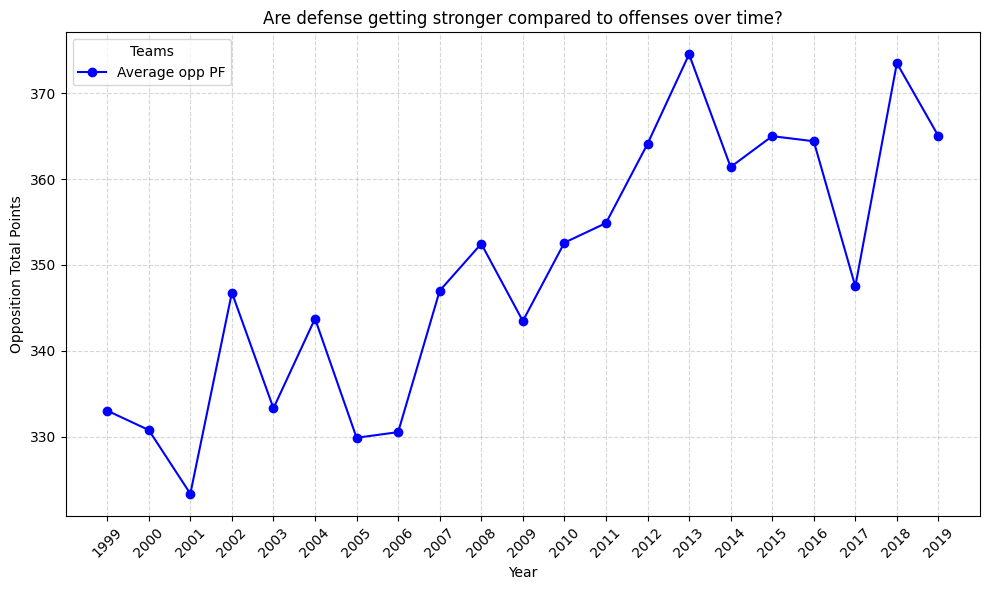

In [10]:
# Question 7: Are team's defenses getting stronger over time compared to their offenses
plt.figure(figsize=(10, 6))

yearly_avg = df.groupby("year")["opp PF"].mean().reset_index()
print(yearly_avg)
plt.plot(range(1999,2020), yearly_avg["opp PF"], marker="o", color="blue", label="Average opp PF")

print("Are defense getting stronger compared to offenses over time?")
plt.title("Are defense getting stronger compared to offenses over time?")
plt.xlabel("Year")
plt.ylabel("Opposition Total Points")
plt.xticks(range(1999,2020), rotation=45)
plt.legend(title="Teams")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [11]:
# Question 8: Which teams have the strongest Quarterback
teams_year_int_ratio = []
for code in df['team_code']:	

	row = df[code == df["team_code"]].iloc[0]
	value = row["pass td"] / row["int"]
	teams_year_int_ratio.append((value, row["team"], row["year"]))

teams_year_int_ratio = sorted(teams_year_int_ratio, key=lambda x: -x[0])


print("\n\nWhich team and year had the best Quarterback using td/int ratio?")
for i in range(5):
	print(teams_year_int_ratio[i][1] + " in " + teams_year_int_ratio[i][2] + " had a td/int ratio of " + str(round(teams_year_int_ratio[i][0], 4)))
	




Which team and year had the best Quarterback using td/int ratio?
nwe in 2016 had a td/int ratio of 16.0
nwe in 2010 had a td/int ratio of 7.4
gnb in 2019 had a td/int ratio of 6.5
gnb in 2011 had a td/int ratio of 6.375
gnb in 2014 had a td/int ratio of 6.3333
